# Calories Burned Predictor Project

Predicting the number of calories burned using multiple regression and visualizing results with Seaborn, using the Kaggle dataset found [here](https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset/data).

In [135]:
#import necessary modules
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import pandas as pd
from google.colab import files
import numpy as np
import seaborn as sns

In [136]:
#assign the preprocessing package and OrdinalEncoder method, upload dataset
label_encoder = preprocessing.OrdinalEncoder()
uploaded = files.upload()

Saving gym_members_exercise_tracking.csv to gym_members_exercise_tracking (2).csv


In [137]:
#using pandas read and display gym_df
gym_df = pd.read_csv('gym_members_exercise_tracking.csv')
gym_df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [138]:
#encode categorical variables (Workout_Type and Gender) using OrdinalEncoder method
numeric_gym_df = gym_df.copy()
numeric_gym_df['Workout_Type'] = label_encoder.fit_transform(numeric_gym_df[['Workout_Type']])
numeric_gym_df['Gender'] = label_encoder.fit_transform(numeric_gym_df[['Gender']])
numeric_gym_df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,1.0,88.3,1.71,180,157,60,1.69,1313.0,3.0,12.6,3.5,4,3,30.20
1,46,0.0,74.9,1.53,179,151,66,1.30,883.0,1.0,33.9,2.1,4,2,32.00
2,32,0.0,68.1,1.66,167,122,54,1.11,677.0,0.0,33.4,2.3,4,2,24.71
3,25,1.0,53.2,1.70,190,164,56,0.59,532.0,2.0,28.8,2.1,3,1,18.41
4,38,1.0,46.1,1.79,188,158,68,0.64,556.0,2.0,29.2,2.8,3,1,14.39


In [143]:
feature_lsts = {} #create dictionary to store feature lists
for i in numeric_gym_df:
  feature_lsts[f'{i}_list'] = list(numeric_gym_df[i])

y = numeric_gym_df['Calories_Burned'] #target feature to be predicted

#transpose array into the format n_samples, n_features; # of rows = # of rows in the df, # of columns = # of features

x = np.transpose(np.array([feature_lsts['Avg_BPM_list'], feature_lsts['Weight (kg)_list']])) #array for multiple regression with two variables; could use more but would require more complex visualization
gym_linear_model = LinearRegression()
gym_linear_model.fit(x,y)

#get regression model specs

print(f'the coefficients for variable 1 (Avg_BPM) and variable 2 (Weight (kg)) are {gym_linear_model.coef_}')
print(f'the intercept for the multiple regression model with just those two variables is {gym_linear_model.intercept_}')

the coefficients for variable 1 (Avg_BPM) and variable 2 (Weight (kg)) are [6.43849814 1.18469115]
the intercept for the multiple regression model with just those two variables is -107.7142125094764


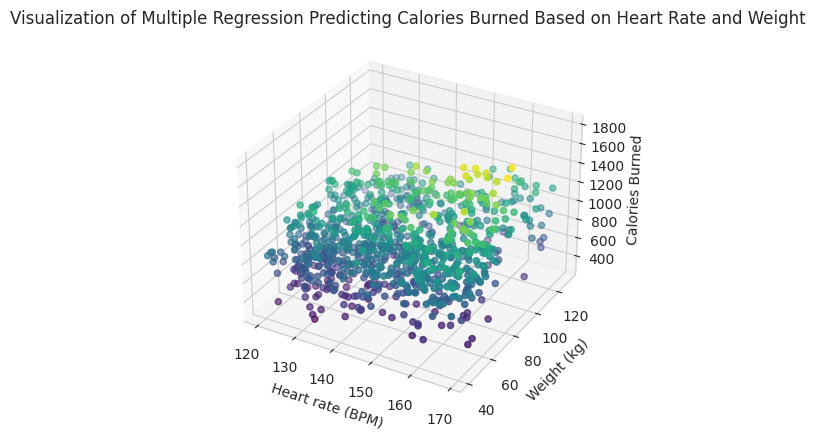

In [148]:
Avg_BPM_plot = feature_lsts['Avg_BPM_list'] # along the x axis
Weight_plot = feature_lsts['Weight (kg)_list'] # along the y axis
Calories_plot = np.array([y]) #along the z axis
sns.set_style(style='whitegrid')
plt.figure (figsize = (5, 5))
seaborn_plot = plt.axes (projection='3d')
seaborn_plot.scatter3D(Avg_BPM_plot, Weight_plot, Calories_plot, c=Calories_plot, cmap='viridis') #set color to correlate with calories

#set labels and title
seaborn_plot.set_title('Visualization of Multiple Regression Predicting Calories Burned Based on Heart Rate and Weight')
seaborn_plot.set_xlabel ('Heart rate (BPM)')
seaborn_plot.set_ylabel ('Weight (kg)')
seaborn_plot.set_zlabel ('Calories Burned')
plt.show ()

# Conclusion
Calories burned could be predicted using any combination of one or all of the other features in the table; however, visualization of multiple regression would be complicated by additional variables. Further investigation into this dataset could also produce individual graphs with each feature to better visualize its importance on the target (in this case, calories burned).  